## Data analysis

In [1]:
from torchvision.datasets import Omniglot
omniglot = Omniglot(root="./data", download=True)
omniglot.download()

alldata = []
for i in omniglot:
    alldata.append(i[1])
    
max(alldata)

Files already downloaded and verified
Files already downloaded and verified


963

In [2]:
from torchvision.datasets import MNIST
mnist = MNIST(root="./data", download=True)
mnist.download()

In [3]:
image = mnist.__getitem__(300)
print(image)

import matplotlib.pyplot as plt

imgplot = plt.imshow(image[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x7FEF38DB0B38>, tensor(8))


All images are have 105 by 105 pixels

(<PIL.Image.Image image mode=L size=105x105 at 0x7FEF31E9EF98>, 15)


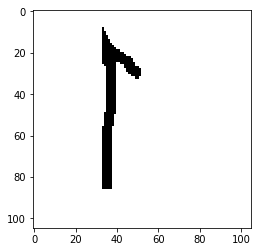

In [4]:
image = omniglot.__getitem__(300)
print(image)

import matplotlib.pyplot as plt

imgplot = plt.imshow(image[0])
# image[0].getdata()

Lets plot a histogram of the image pixel count to see the range of pixels

(array([  469.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

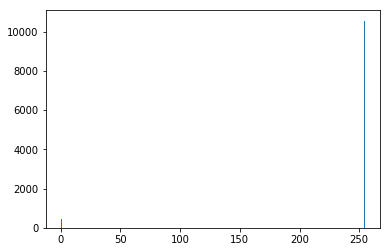

In [5]:
plt.hist(image[0].getdata(), bins=256)

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

# trainset = torchvision.datasets.CIFAR10(root='./data',
#                                         download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data',
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)

trainset = torchvision.datasets.Omniglot(root='./data',
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.Omniglot(root='./data',
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images

          
# dataiter = iter(trainloader)
# image = dataiter.next()
# for row in image:
#     print("thing", row[0].min())
#     print(row.size())
# images, labels = dataiter.next()


# # show images
# imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [22]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.batchNorm = nn.BatchNorm2d(105)
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*23*23, 1200)
        self.fc2 = nn.Linear(1200, 1000)
        self.fc3 = nn.Linear(1000, 964)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.batchNorm(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*23*23)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x


net = Net()

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [24]:
ENABLE_CUDA = False

if ENABLE_CUDA:
    net.cuda()

for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        if ENABLE_CUDA:
            inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

TypeError: Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.5/dist-packages/torchvision/datasets/omniglot.py", line 70, in __getitem__
    image = self.transform(image)
  File "/usr/local/lib/python3.5/dist-packages/torchvision/transforms/transforms.py", line 49, in __call__
    img = t(img)
  File "/usr/local/lib/python3.5/dist-packages/torchvision/transforms/transforms.py", line 143, in __call__
    return F.normalize(tensor, self.mean, self.std)
  File "/usr/local/lib/python3.5/dist-packages/torchvision/transforms/functional.py", line 167, in normalize
    for t, m, s in zip(tensor, mean, std):
TypeError: zip argument #2 must support iteration


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
if ENABLE_CUDA:
    images, labels = images.cuda(), labels.cuda()

print(images)
results = net(images)
results = results.detach().cpu().numpy()
classification = []

for i, result in enumerate(results):
    print(np.argmax(result), labels[i])
    #print(result)
    classification.append(np.argmax(result))
    


# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
# print(' '.join('%5s' % classes[classification[j]] for j in range(4)))